# Data Science Notebook.

This is Hari Prasad and I am creating this notebook for the learning purpose of beginers. It works only on Iris dataset and covers regressions, classifications using classical models to advanced deep learning models. Regression cases are explained in the begining but there onwards it will not be explored as much as multiclass classification and left for the learner to playaround to change target variables and convert the problem to find say, sepal length.

Objective is to get kick started with quick and dirty, means: Just get the data and apply the algorithm and predict the code. As I develop this notebook further, I am planning to introduce the proper structure of data science project.

Algorithms Covered (Not exactly in Order):

1. Linear Regression
2. Logistic Regression
3. Keras Model
4. Tensorflow Model
5. Decision Tree
6. Random Forest
7. K Means Clustering
8. Support Vector Machine
9. Naive Bayes

## Start

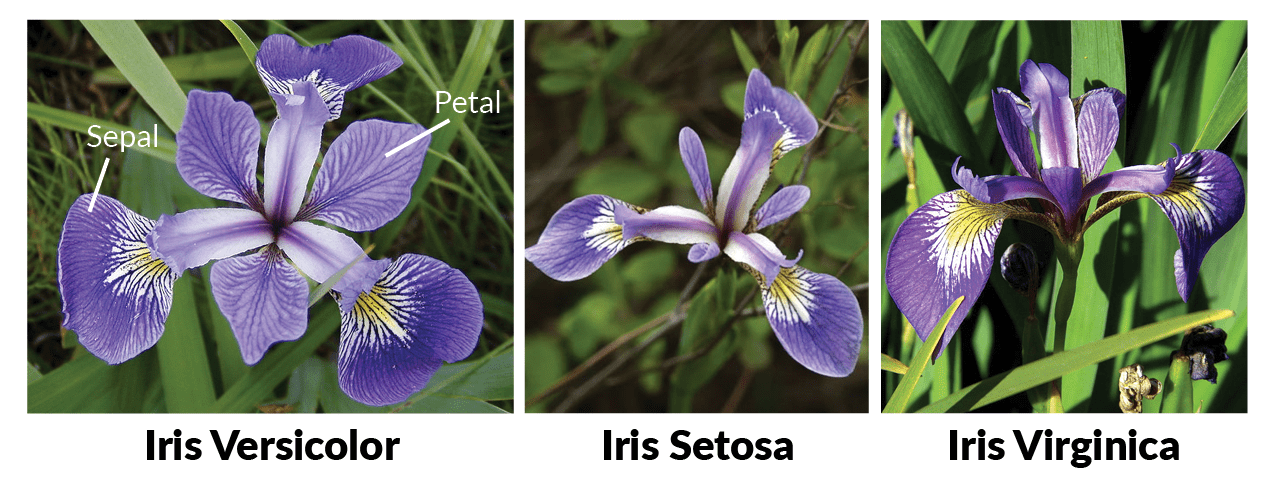

In [1]:
from IPython.display import Image
PATH = "C:\\Users\\IBM_ADMIN\\Pictures\\"
Image(filename = PATH + "iris.png")

In [2]:
#Change the directory.
import os
os.getcwd()

'C:\\Users\\IBM_ADMIN'

In [3]:
path="Z:\\Documents\\Machine Learning"
os.chdir(path)

In [4]:
#Import file with header.
from pandas import read_csv
data=read_csv("iris.csv")

In [5]:
data.shape

(150, 5)

In [6]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
cat              object
dtype: object

In [7]:
#One hot code encoding of categorical variable cat.
import pandas as pd
one_hot=pd.get_dummies(data.cat)

In [8]:
df=data.join(one_hot)
df.dtypes
#What does dtype at the end signifies?

sepal_length       float64
sepal_width        float64
petal_length       float64
petal_width        float64
cat                 object
Iris-setosa          uint8
Iris-versicolor      uint8
Iris-virginica       uint8
dtype: object

In [9]:
#Drop Categorical columns
df=df.drop('cat',axis=1)

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [11]:
#For Regression let us predict sepal_length from other variables.
from sklearn.linear_model import LinearRegression

In [12]:
#Create Model.
model=LinearRegression()

In [13]:
#Create Features and Target Dataframes.
array = df.values

In [14]:
df.dtypes

sepal_length       float64
sepal_width        float64
petal_length       float64
petal_width        float64
Iris-setosa          uint8
Iris-versicolor      uint8
Iris-virginica       uint8
dtype: object

In [15]:
#Our Prediction column is at 0 th index and all other (1 till 7th) are our predictors columns
X=array[:,1:7]
Y=array[:,0]

In [16]:
#Split the data in to train and test sets.
test_size = 0.33
seed = 7
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [17]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#Parameters Learnt
print('Coefficients: \n', model.coef_)

Coefficients: 
 [ 0.5909224   0.7962453  -0.28641615  0.4916739  -0.09938941 -0.3922845 ]


In [19]:
print(model.predict(X_test))
y_pred = model.predict(X_test)

[6.31902086 6.22009361 4.90233254 6.22009361 5.57445409 4.19322566
 6.59768397 5.86122653 5.11075551 6.33827809 6.56093303 6.42782096
 5.47341827 7.2693283  4.95150645 6.49122684 6.58093137 6.69661122
 5.34712447 4.88249587 5.65099456 6.77174444 6.34889205 5.85258325
 6.9336758  6.08014727 6.05903554 5.42273492 6.11310252 6.60438606
 5.96196279 5.33068743 4.75119281 6.53106184 6.05903554 4.68649587
 4.93097416 5.42855801 4.98195707 6.87009225 6.88811991 6.36942434
 6.48439257 6.63751898 6.06714487 4.89241421 6.22820294 5.49244112
 6.27235158 4.99257103]


In [20]:
#Mean Squared error
from sklearn.metrics import mean_squared_error
print("Mean squared error:", mean_squared_error(Y_test, y_pred))

Mean squared error: 0.10177034686835101


In [21]:
from sklearn.metrics import r2_score
# Explained variance score: 1 is perfect prediction
print('Variance score:',r2_score(Y_test, y_pred))

Variance score: 0.8194908320237266


In [22]:
#Logistic Regression
#We will predict the class of flower and then we will check the accuracy.
#We have to make it cat
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
cat              object
dtype: object

In [23]:
data["cat"] = data["cat"].astype('category')

In [24]:
data.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
cat             category
dtype: object

In [25]:
#import pandas as pd
#data.cat = pd.Categorical(data.cat).codes

In [26]:
#Create Features and Target Dataframes.
array_log = data.values

In [27]:
data.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
cat             category
dtype: object

In [28]:
#Our Prediction column is at 4 th index and all other (0 till 5th) are our predictors columns
#From 0 coulmn I want 4 columns
X=array_log[:,0:4]
Y=array_log[:,4]

In [29]:
#For Regression let us predict sepal_length from other variables.
from sklearn.linear_model import LogisticRegression

In [30]:
model_log=LogisticRegression(multi_class="ovr")

In [31]:
#Split the data in to train and test sets.
test_size = 0.33
seed = 7
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [32]:
model_log.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
print(model_log.predict(X_test))
y_pred = model_log.predict(X_test)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa']


In [34]:
Y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa'], dtype=objec

In [35]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred,labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

array([[14,  0,  0],
       [ 0, 14,  4],
       [ 0,  1, 17]], dtype=int64)

In [37]:
#Accuracy Report
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred,target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.93      0.78      0.85        18
 Iris-virginica       0.81      0.94      0.87        18

    avg / total       0.91      0.90      0.90        50



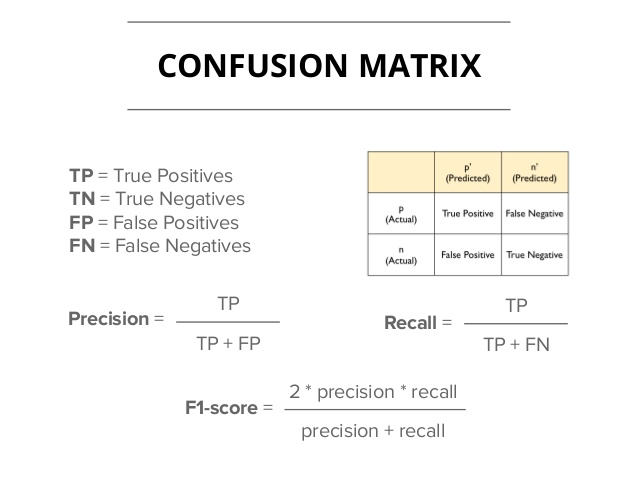

In [38]:
Image(filename = PATH + "pr2.jpg")

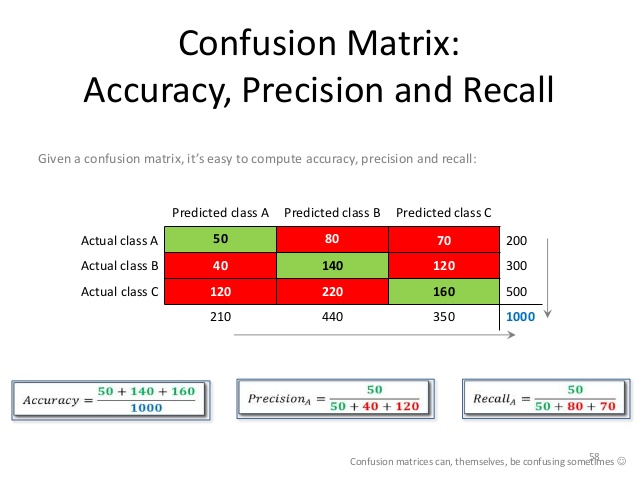

In [39]:
Image(filename = PATH + "pr.jpg")

In [40]:
!pip install keras==2.0.5

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [43]:
#Deep Learning
#	4 inputs -> [8 hidden nodes] -> 3 outputs
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold

In [44]:
#Create Features and Target Dataframes.
array = df.values

In [45]:
array.shape

(150, 7)

In [46]:
df.dtypes

sepal_length       float64
sepal_width        float64
petal_length       float64
petal_width        float64
Iris-setosa          uint8
Iris-versicolor      uint8
Iris-virginica       uint8
dtype: object

In [47]:
#Our Prediction column is at 0 th index and all other (1 till 7th) are our predictors columns
X=array[:,0:4]
Y=array[:,4:7]

In [48]:
#Split the data in to train and test sets.
test_size = 0.33
seed = 7
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

In [49]:
#Dimensions of Input_dim (Number of features) and Output Dimension(Y dimension).
X.shape[1],Y.shape[1]

(4, 3)

In [50]:
#Baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(3, input_dim=4, activation='softmax'))
    #model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [51]:
model=baseline_model()
model.fit(X_train, Y_train,epochs=200,batch_size=5)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/200
100/100 [==============================] - 0s - loss: 2.4369 - acc: 0.5100     
Epoch 2/200
100/100 [==============================] - 0s - loss: 0.8547 - acc: 0.7000     
Epoch 3/200
100/100 [==============================] - 0s - loss: 0.7881 - acc: 0.6300     
Epoch 4/200
100/100 [==============================] - 0s - loss: 0.7484 - acc: 0.6600     
Epoch 5/200
100/100 [==============================] - 0s - loss: 0.6990 - acc: 0.7100     
Epoch 6/200
100/100 [==============================] - 0s - loss: 0.6806 - acc: 0.6700     
Epoch 7/200
100/100 [==============================] - 0s - loss: 0.6337 - acc: 0.7000     
Epoch 8/200
100/100 [==============================] - 0s - loss: 0.6355 - acc: 0.6700     
Epoch 9/200
100/100 [==============================] - 0s - loss: 0.6269 - acc: 0.6900     
Epoch 10/200
100/100 [====

100/100 [==============================] - 0s - loss: 0.2921 - acc: 0.9600     
Epoch 83/200
100/100 [==============================] - 0s - loss: 0.2898 - acc: 0.9800     
Epoch 84/200
100/100 [==============================] - 0s - loss: 0.2868 - acc: 0.9600     
Epoch 85/200
100/100 [==============================] - 0s - loss: 0.2911 - acc: 0.9800     
Epoch 86/200
100/100 [==============================] - 0s - loss: 0.2828 - acc: 0.9700     
Epoch 87/200
100/100 [==============================] - 0s - loss: 0.2800 - acc: 0.9700     
Epoch 88/200
100/100 [==============================] - 0s - loss: 0.2806 - acc: 0.9800     
Epoch 89/200
100/100 [==============================] - 0s - loss: 0.2834 - acc: 0.9700     
Epoch 90/200
100/100 [==============================] - 0s - loss: 0.2833 - acc: 0.9600     
Epoch 91/200
100/100 [==============================] - 0s - loss: 0.2814 - acc: 0.9600     
Epoch 92/200
100/100 [==============================] - 0s - loss: 0.2794 - acc: 0.

100/100 [==============================] - 0s - loss: 0.2028 - acc: 0.9700     
Epoch 170/200
100/100 [==============================] - 0s - loss: 0.2066 - acc: 0.9900     
Epoch 171/200
100/100 [==============================] - 0s - loss: 0.2024 - acc: 0.9700     
Epoch 172/200
100/100 [==============================] - 0s - loss: 0.2018 - acc: 0.9900     
Epoch 173/200
100/100 [==============================] - 0s - loss: 0.2018 - acc: 0.9800     
Epoch 174/200
100/100 [==============================] - 0s - loss: 0.2003 - acc: 0.9900     
Epoch 175/200
100/100 [==============================] - 0s - loss: 0.2029 - acc: 0.9900     
Epoch 176/200
100/100 [==============================] - 0s - loss: 0.2002 - acc: 0.9800     
Epoch 177/200
100/100 [==============================] - 0s - loss: 0.2001 - acc: 0.9700     
Epoch 178/200
100/100 [==============================] - 0s - loss: 0.1989 - acc: 0.9800     
Epoch 179/200
100/100 [==============================] - 0s - loss: 0.1983

In [52]:
results = model.evaluate(X_test, Y_test)

32/50 [==================>...........] - ETA: 0s

In [53]:
print ( "Accuracy",results[1])

Accuracy 0.94


In [54]:
import numpy as np
predictions=np.round(model.predict(X_test))
predictions.shape

(50, 3)

In [55]:
predictions[0:2]

array([[0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [56]:
Y_test[0:2]

array([[0., 0., 1.],
       [0., 1., 0.]])

### Label ranking average precision

Multioutput Classification Metrics.
http://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics

The label_ranking_average_precision_score function implements label ranking average precision (LRAP). This metric is linked to the average_precision_score function, but is based on the notion of label ranking instead of precision and recall.

Label ranking average precision (LRAP) is the average over each ground truth label assigned to each sample, of the ratio of true vs. total labels with lower score. This metric will yield better scores if you are able to give better rank to the labels associated with each sample. The obtained score is always strictly greater than 0, and the best value is 1. If there is exactly one relevant label per sample, label ranking average precision is equivalent to the mean reciprocal rank.

In [57]:
#Multioutput Classification Metrics.
#http://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics
from sklearn.metrics import label_ranking_average_precision_score
print(label_ranking_average_precision_score(Y_test, predictions))

0.96


In [58]:
#Tensorflow
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf

In [59]:
Image(url ="https://isaacchanghau.github.io/images/deeplearning/activationfunction/softmax.png")

In [60]:
##Courtesy: https://www.linkedin.com/pulse/artificial-intelligence-how-do-neural-networks-work-better-vignali
Image(url ="https://i.stack.imgur.com/vPTf6.png")

In [61]:
Image(url ="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAo6AAAAJGNlNjZhZDhiLTNjNzktNGVmOS1iZGZlLWE1MmY5NWI5ODBmOQ.png")

In [62]:

Image(url ="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAA2eAAAAJDY1ZWRkNmU5LThkNmQtNGU1YS1iNmUzLWEwNDc1NzE3MTJhMQ.png")

In [63]:
Image(url ="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAvOAAAAJDIzMGRiZGI3LTA1MzQtNDk1ZS1iZGIxLWY4Y2FkMWQ0MTQwYg.png")

In [64]:
Image(url ="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAqgAAAAJGU3YTkzNjM4LTk3YjYtNGE2Mi1iMTIyLTQ3MGU0YzNiMDc1Mw.png")

In [65]:
# Session
sess = tf.Session()

In [66]:
# Interval / Epochs
interval = 50
epoch = 500

In [67]:
# Initialize placeholders
X_data = tf.placeholder(shape=[None, 4], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 3], dtype=tf.float32)

In [68]:
# Input neurons : 4
# Hidden neurons : 8
# Output neurons : 3
hidden_layer_nodes = 3

# Create variables for Neural Network layers
w1 = tf.Variable(tf.random_normal(shape=[4,hidden_layer_nodes])) # Inputs -> Hidden Layer
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))   # First Bias
#w2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,3])) # Hidden layer -> Outputs
#b2 = tf.Variable(tf.random_normal(shape=[3]))   # Second Bias

In [69]:
# Operations
#hidden_output = tf.nn.relu(tf.add(tf.matmul(X_data, w1), b1))
final_output = tf.nn.softmax(tf.add(tf.matmul(X_data, w1), b1))

### Defining Cross Entropy Loss

In [70]:
Image(url = "https://theneuralperspective.files.wordpress.com/2016/10/screen-shot-2016-11-06-at-8-13-41-pm.png?w=620")

In [71]:
Image(url="https://image.slidesharecdn.com/gentlestintrototensorflowpart3-160629045311/95/gentlest-introduction-to-tensorflow-part-3-71-638.jpg?cb=1486266200")

In [72]:
# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(y_target * tf.log(final_output), axis=0))

In [73]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [74]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [75]:
# Training
print('Training the model...')
for i in range(1, (epoch + 1)):
    sess.run(optimizer, feed_dict={X_data: X_train, y_target: Y_train})
    if i % interval == 0:
        print('Epoch', i, '|', 'Loss:', sess.run(loss, feed_dict={X_data: X_train, y_target: Y_train}))

Training the model...
Epoch 50 | Loss: 16.55505
Epoch 100 | Loss: 13.865701
Epoch 150 | Loss: 12.545047
Epoch 200 | Loss: 11.652982
Epoch 250 | Loss: 10.962715
Epoch 300 | Loss: 10.3918705
Epoch 350 | Loss: 9.902253
Epoch 400 | Loss: 9.472951
Epoch 450 | Loss: 9.091036
Epoch 500 | Loss: 8.747783


In [76]:
# Prediction
import numpy as np
print()
for i in range(len(X_test)):
    print('Actual:', Y_test[i], 'Predicted:', np.rint(sess.run(final_output, feed_dict={X_data: [X_test[i]]})))


Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [0. 1. 0.] Predicted: [[0. 0. 1.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 0. 1.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 0. 1.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 0. 1.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [0

In [77]:
predicted_tf=(np.rint(sess.run(final_output, feed_dict={X_data: X_test})))

In [78]:
#Multioutput Classification Metrics.
#http://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics
from sklearn.metrics import label_ranking_average_precision_score
print(label_ranking_average_precision_score(Y_test, predicted_tf))

0.9333333333333335


## Decision Tree

http://www.ke.tu-darmstadt.de/lehre/archiv/ws0809/mldm/dt.pdf

## Ref: http://www.saedsayad.com/decision_tree.htm

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy). Leaf node (e.g., Play) represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

In [79]:
Image(url="http://www.saedsayad.com/images/Decision_Tree_1.png")

http://people.revoledu.com/kardi/tutorial/DecisionTree/how-to-measure-impurity.htm

In [80]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [89]:
!pip install graphviz

notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
jupyter-console 5.2.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.


In [91]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

In [92]:
np.mean(iris.data[:,3])

1.1986666666666668

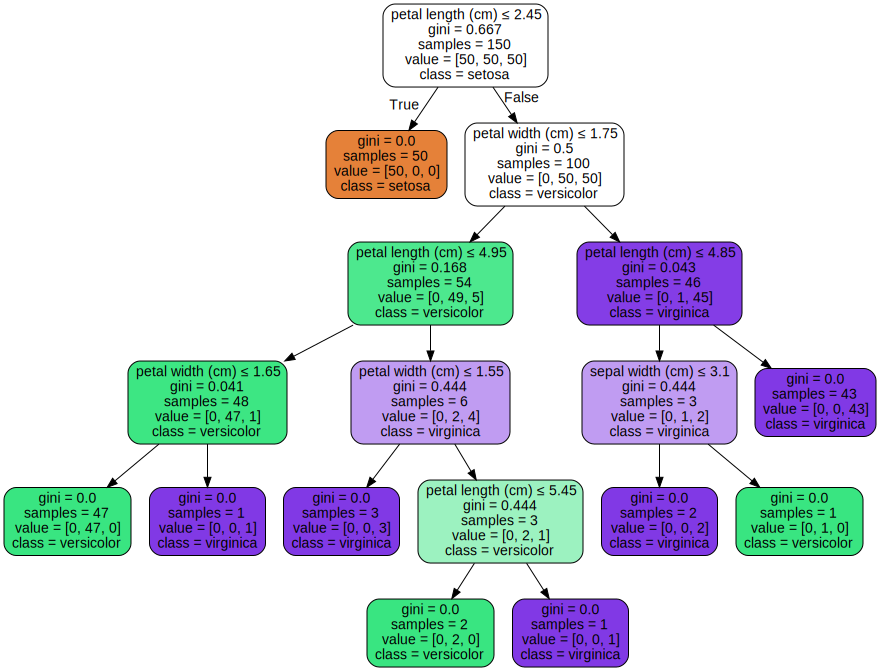

In [93]:
>>> dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
>>> graph = graphviz.Source(dot_data)  
>>> graph 

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
iris = datasets.load_iris()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  species  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
5  setosa  
6  setosa  
7  setosa  
8  setosa  
9  setosa  


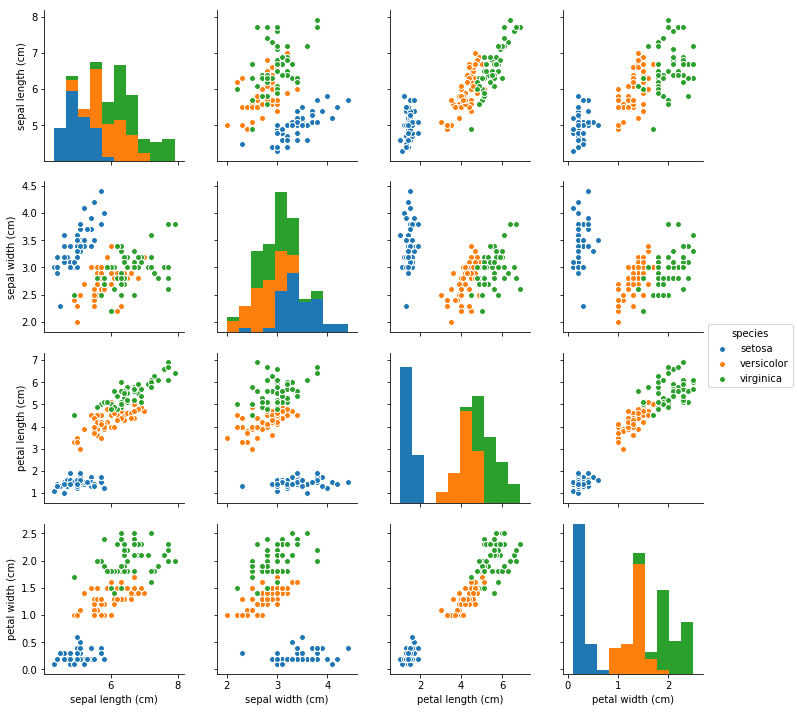

In [95]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = np.array([iris.target_names[i] for i in iris.target])
print(df[1:10])
sns.pairplot(df, hue='species')

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, test_size=0.5, stratify=iris.target, random_state=123456)

Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [98]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.973
Mean accuracy score: 0.933


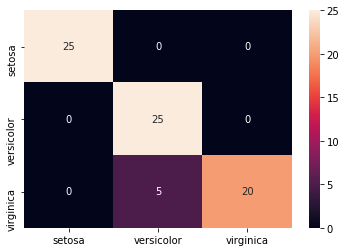

In [99]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

In [100]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()
X_iris = iris.drop('species', axis=1)
X_iris.shape
y_iris = iris['species']
y_iris.shape

(150,)

In [101]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

K Means Clustering

In [218]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# sklearn provides the iris species as integer values since this is required for classification
# here we're just adding a column with the species names to the dataframe for visualisation
df['species'] = np.array([iris.target_names[i] for i in iris.target])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, test_size=0.5, stratify=iris.target, random_state=123456)
from sklearn.cluster import KMeans
Kmean_model=KMeans(n_clusters=3,random_state=0,max_iter=100)
Kmean_model.fit(X_train,y_train)
predicted=Kmean_model.predict(X_train)
print("Real Labels",y_train,"Predicted Cluster",predicted)

Real Labels [1 1 2 2 0 2 2 0 2 2 1 1 0 1 1 1 0 2 2 0 0 0 1 0 0 0 1 2 2 1 0 0 0 0 2 2 1
 2 0 2 2 2 0 1 2 1 2 0 0 0 2 2 0 0 1 1 1 0 1 1 1 2 0 1 0 2 1 0 1 1 2 2 1 1
 2] Predicted Cluster [2 2 0 0 1 0 0 1 0 0 2 2 1 2 2 2 1 0 2 1 1 1 2 1 1 1 2 2 2 2 1 1 1 1 0 0 2
 0 1 0 0 0 1 2 0 0 0 1 1 1 0 0 1 1 2 2 2 1 2 2 2 0 1 2 1 0 2 1 2 2 0 0 2 2
 2]


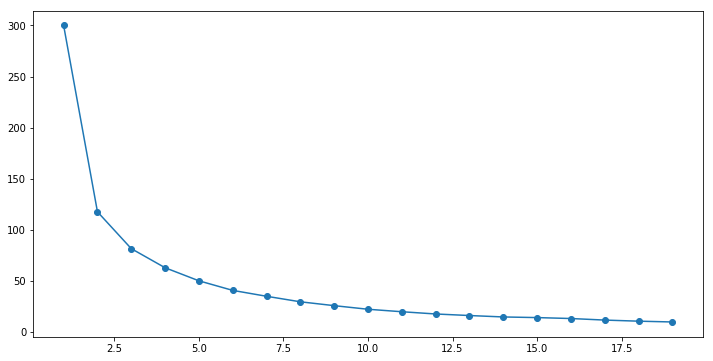

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X_train )

#Finding cluster size by elbow method.
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  Kmean_model = KMeans( num_clusters,random_state=0)
  Kmean_model.fit( X_scaled )
  cluster_errors.append( Kmean_model.inertia_ )

clusters_df  = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [246]:
Kmean_model = KMeans( 3,random_state=0)
Kmean_model.fit( X_scaled )
df_labels=pd.DataFrame(Kmean_model.labels_)
df_labels.columns=["predicted_clusters"]
df_real=pd.DataFrame(y_train)
df_real.columns=["Actual"]
df_real.groupby("Actual").size(),df_labels.groupby("predicted_clusters").size()

(Actual
 0    25
 1    25
 2    25
 dtype: int64, predicted_clusters
 0    34
 1    24
 2    17
 dtype: int64)

In [225]:
#How to get top 10 indexes which are near ones to cluster centroid.
#Kmean_model.transform(X_scaled)[:, cluster_number]
d = Kmean_model.transform(X_scaled)[:, 0]
ind = np.argsort(d)[::][:10]
ind,X_scaled[ind]

(array([70,  8, 37, 45, 71, 65, 50, 40, 44, 46], dtype=int64),
 array([[ 0.74740053, -0.22909306,  0.79603503,  1.003211  ],
        [ 0.74740053, -0.22909306,  0.96612799,  0.74375988],
        [ 0.62633133,  0.01992114,  0.96612799,  0.74375988],
        [ 0.98953893, -0.22909306,  0.68263973,  0.61403432],
        [ 0.74740053,  0.26893533,  0.73933738,  1.003211  ],
        [ 0.74740053, -0.22909306,  1.13622094,  1.26266212],
        [ 1.23167733,  0.01992114,  0.73933738,  1.39238768],
        [ 0.62633133,  0.26893533,  0.85273268,  1.39238768],
        [ 0.98953893,  0.01992114,  1.02282564,  1.52211324],
        [ 0.98953893,  0.51794953,  1.07952329,  1.13293656]]))

Support Vector Machine

In [239]:
from sklearn.svm import SVC
# ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model_svc = SVC(kernel='rbf')
model_svc.fit(X_train,y_train)
confusion_matrix(y_test,model_svc.predict(X_test))

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  3, 22]], dtype=int64)

Naive Bayes

In [251]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


In [241]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']
